---
<h1 style="text-align: center;">Projeto AMG:</h1>
<h2 style="text-align: center;">Análise de Qualidade de Vinhos</h2>

*Discentes:*

    *   Gabriel D'assumpção de Carvalho
    *   Arthur Bezerra Calado
    *
    *

*Date:* 08/05/2024

---
---

# Introdução

O seguinte relatório vai estar utilizando a ([base de dados de vinho](https://archive.ics.uci.edu/dataset/186/wine+quality)), a qual é multivariada e contém diversas variáveis que descrevem as características físico-químicas de vinhos brancos e tintos, bem como sua qualidade atribuída por especialistas. As variáveis incluem medidas como acidez fixa, acidez volátil, teor alcoólico, entre outras.

| **Nome da variável**       | **Papel**          | **Tipo**       | **Descrição**                 | **Valores ausentes** |
|------------------------|----------------|------------|---------------------------|------------------|
| acidez fixa          | Característica | Contínuo   |                           | Não              |
| acidez volátil       | Característica | Contínuo   |                           | Não              |
| ácido cítrico            | Característica | Contínuo   |                           | Não              |
| açúcar residual         | Característica | Contínuo   |                           | Não              |
| Cloretos               | Característica | Contínuo   |                           | Não              |
| Dióxido de enxofre livre    | Característica | Contínuo   |                           | Não              |
| Dióxido de enxofre total   | Característica | Contínuo   |                           | Não              |
| densidade              | Característica | Contínuo   |                           | Não              |
| ph                     | Característica | Contínuo   |                           | Não              |
| Sulfatos               | Característica | Contínuo   |                           | Não              |
| álcool                 | Característica | Contínuo   |                           | Não              |
| qualidade              | Alvo           | Categórico    | escore entre 0 e 10       | Não              |
| Cor                    | Característica          | Categórico | vermelho (1) ou branco (0)        | Não              |


A primeira parte deste relatório consistirá em uma análise exploratória dos dados, com o objetivo de compreender melhor as 13 variáveis. Serão apresentados detalhes como mínimo, máximo, média, mediana, variância, possíveis outliers, assimetria/simetria e a distribuição de probabilidade de cada variável.

Em seguida, avançaremos para a construção de quatro modelos de machine learning, utilizando as seguintes técnicas:

1) Arvores de decisão;
2) Bayesiano ingenuo;
3) Regressão logistica;
4) k-vizinhos.
  
A variável **qualidade** será utilizada como a variável resposta/dependente (y), fornecendo dados sobre a qualidade do vinho, variando de 0 (menor nota) a 10 (maior nota).

# Análise Exploratória

## Biblioteca utilizadas:

1) Pandas -> manipulação de dados;
2) numpy -> cálculos estatísticos;
3) plotly -> gráficos interrativos;
4) matplotlib -> gráficos;
5) scipy -> transformação de variável.

In [1]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

In [2]:
# Importação das bibliotecas
import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

In [3]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")


In [4]:
# Importando os dados
df = pd.read_csv(
    "https://raw.githubusercontent.com/gabrieldadcarvalho/machine_learning/main/wine_quality/wine_quality.csv",
    sep=";",
)

In [5]:
# Obtendo as variáveis independentes e dependente
x = df.iloc[:, :12]
y = df.iloc[:, -1]  # Qualidade vinho

In [6]:
# Verificando as 5 primeiras linhas de x e y
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [7]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

In [8]:
pd.options.display.float_format = "{:.4f}".format
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,color
count,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000,6492.0000
mean,7.2153,0.3397,0.3186,5.4403,0.0560,30.5206,115.7150,1.7114,3.2185,0.5313,0.2463
std,1.2968,0.1647,0.1454,4.7553,0.0350,17.7518,56.5253,7.6390,0.1608,0.1488,0.4309
min,3.8000,0.0800,0.0000,0.6000,0.0090,1.0000,6.0000,0.9871,2.7200,0.2200,0.0000
25%,6.4000,0.2300,0.2500,1.8000,0.0380,17.0000,77.0000,0.9923,3.1100,0.4300,0.0000
50%,7.0000,0.2900,0.3100,3.0000,0.0470,29.0000,118.0000,0.9949,3.2100,0.5100,0.0000
75%,7.7000,0.4000,0.3900,8.1000,0.0650,41.0000,156.0000,0.9970,3.3200,0.6000,0.0000
max,15.9000,1.5800,1.6600,65.8000,0.6110,289.0000,440.0000,103.8980,4.0100,2.0000,1.0000


### Dados faltantes

Como pode ser visto na descrição das variáveis explicativas, todas elas possuem 4898 observações, portanto nenhuma possui dados faltantes.

### Acidez Fixa

In [9]:
x["fixed acidity"].describe()

count   6492.0000
mean       7.2153
std        1.2968
min        3.8000
25%        6.4000
50%        7.0000
75%        7.7000
max       15.9000
Name: fixed acidity, dtype: float64

In [10]:
x["fixed acidity"].mode()

0   6.8000
Name: fixed acidity, dtype: float64

Ao analisarmos em detalhes os dados relativos à acidez fixa, percebemos que a maioria dos vinhos possui uma acidez próxima de 7.22, variando entre 3.8 e 15.9. Este intervalo considerável é acompanhado por um desvio padrão de aproximadamente 1.3, indicando uma dispersão significativa dos valores. Assim, a maioria dos vinhos é encontrada dentro da faixa de acidez entre 5.92 e 8.52.

É importante destacar que a média supera tanto a mediana (7) quanto a moda (6.8), sugerindo uma assimetria positiva nos dados.

Para explorar eventuais outliers e a natureza da assimetria nos dados, a proposta é utilizar tanto um histograma quanto um boxplot.

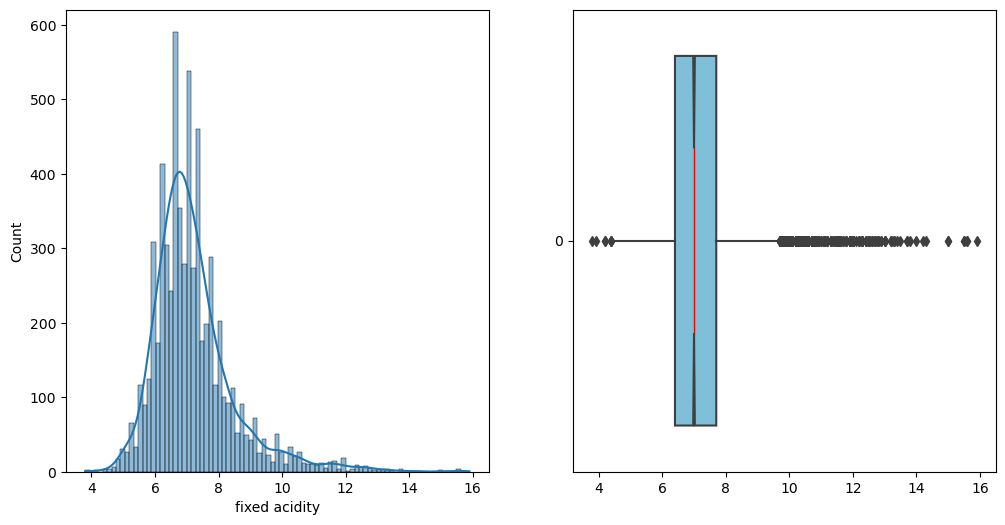

In [11]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["fixed acidity"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["fixed acidity"],  orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

A análise do histograma e do boxplot podemos ver a assimetria possitiva mencionada acima, para tratar dos possíveis outliers e a assemetria nos dados mais para frente vamos propor uma transformação na variável.

### Acidez Volátil

In [12]:
x["volatile acidity"].describe()

count   6492.0000
mean       0.3397
std        0.1647
min        0.0800
25%        0.2300
50%        0.2900
75%        0.4000
max        1.5800
Name: volatile acidity, dtype: float64

In [13]:
# Calculando a moda da acidez fixa
moda_acid_v = x["volatile acidity"].mode()
moda_acid_v

0   0.2800
Name: volatile acidity, dtype: float64

Ao verificar as estatística da acidez volátil, é possível dizer que os vinhos tem uma acidez volátil em torno de 0.34, variando entre 0.08 e 1.58. Entretando, o seu desvio padrão é de 0.165, indicando que a grande parte dos vinhos tem essa acidez entre 0.175 e 0.505.

Ainda podemos ver que a média é maior do que a mediana (0.29) e moda (0.28), indicando um assimetria possitiva nos dados.

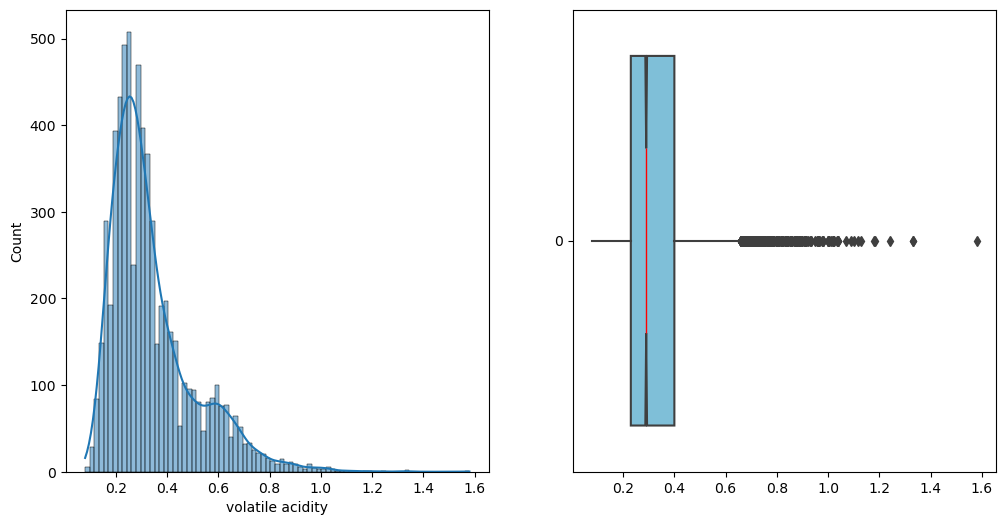

In [14]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["volatile acidity"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["volatile acidity"],  orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Observando o gráfico de histograma e o boxplot da variável de acidez volátil, podemos ver que essa varíavel possui uma assimetria positiva nos seus dados, afim de melhorar isso ao decorrer da análise vamos propor uma transformação tentar corrigir essa assimetria possitiva.

### Ácido Cítrico

In [15]:
x["citric acid"].describe()

count   6492.0000
mean       0.3186
std        0.1454
min        0.0000
25%        0.2500
50%        0.3100
75%        0.3900
max        1.6600
Name: citric acid, dtype: float64

In [16]:
x["citric acid"].mode()

0   0.3000
Name: citric acid, dtype: float64

Ao analisarmos a descrição da variável de ácido cítrico, a média dessa variável é de aproximadamente 0.334, com um desvio padrão de cerca de 0.1454, o que sugere que a maioria dos dados está concentrada no intervalo entre 0.1956 e 0.4864. Também é possivel notar que seus valores variam entre 0 e 1.66.

Além disso, a mediana é de 0.31, estando próxima a média mas um pouco menor. Vale ressaltar também que a distância do 1º quartil à mediana é menor do que a do 3º quartil, o que sugere uma assimetria positiva dos dados, com uma concentração maior de observações à esquerda.

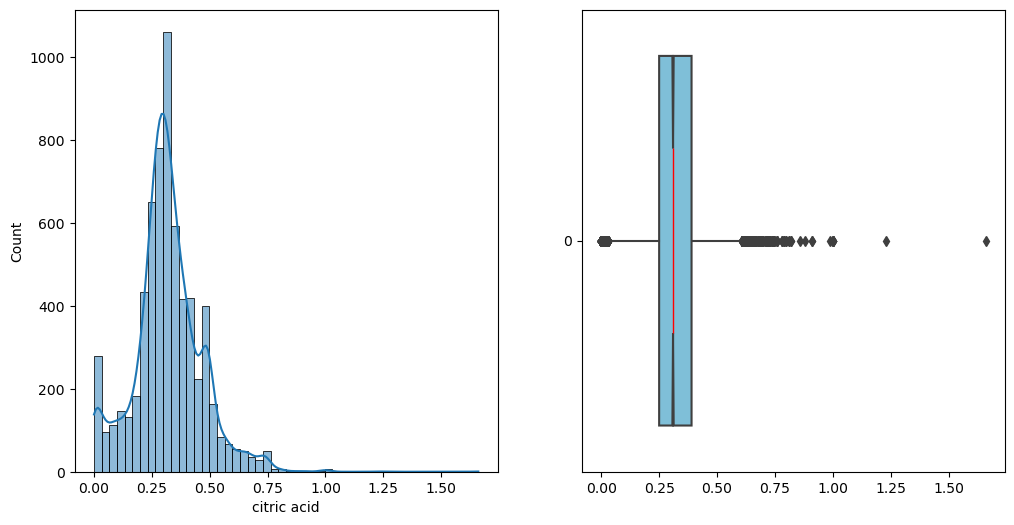

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["citric acid"], kde=True, bins=50)
plt.subplot(1, 2, 2)
sns.boxplot(x["citric acid"],  orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Observando o gráfico de histograma e o boxplot, podemos ver que essa varíavel possui uma assimetria positiva nos seus dados. Para melhorar a qualidade da distribuição das variáveis descrita acima, vamos propor uma combinação nessas variáveis.

### Transformação nas variáveis de acidez

Como vimos nos 3 tôpicos acima, as variáveis de acidez possui alguns anomalias nas suas distribuição, contendo muitos outliers que distorcem a sua distribuição. Afim de melhorar isso, foi proposto uma transformação para criar uma nova variável **(total acidity)**. Essa transformação consiste na seguinte combinação:

    x['total_acidity'] = (log(x["fixed acidity"] * x["volatile acidity"] + x["citric acid"])) ** (1/1.5)


In [18]:
# Criação da nova variável
x["total_acidity"] = np.log(
    x["fixed acidity"] * x["volatile acidity"] + x["citric acid"]
)**(1/1.5)

In [19]:
# Estatística da nova variável
x["total_acidity"].describe()

count   6463.0000
mean       0.9352
std        0.2951
min        0.0159
25%        0.7359
50%        0.9081
75%        1.1330
max        1.8543
Name: total_acidity, dtype: float64

Podemos avaliar as estatísticas descritivas da nova variável para determinar a simetria dos dados. Quando a média se aproxima da mediana e os valores do primeiro e terceiro quartis estão próximos da média mais ou menos um desvio padrão, isso sugere uma distribuição simétrica dos dados. Essa proximidade entre a média e a mediana, juntamente com a distribuição equilibrada em torno dos quartis, indica uma disposição uniforme dos dados ao redor da medida central. Essa simetria é um indicativo valioso, pois sugere que os dados não são excessivamente influenciados por valores extremos e estão distribuídos de maneira mais uniforme.

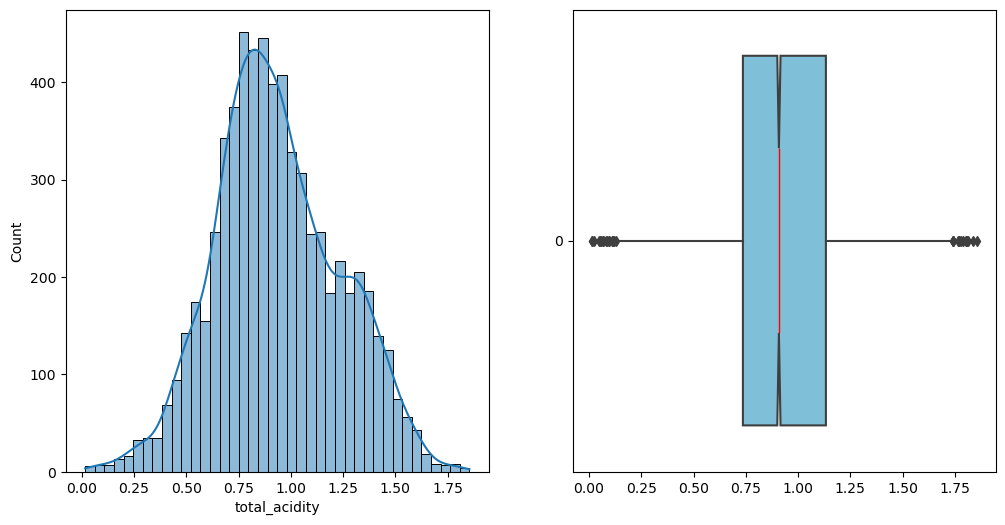

In [20]:
# Histograma total_acidity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["total_acidity"], kde=True, bins=40)
plt.subplot(1, 2, 2)
sns.boxplot(x["total_acidity"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Podemos observar que a assimetria nos dados dessa nova variável apresenta uma distribuição mais simétrica. Esse resultado fortalece nossas expectativas e nos fornece uma base sólida para ajustar os modelos de aprendizado de máquina no futuro. Uma distribuição mais simétrica sugere uma representação mais equilibrada dos dados, o que é fundamental para garantir a eficácia e a robustez dos modelos que serão aplicados.

### Açucar Residual

In [21]:
x["residual sugar"].describe()

count   6492.0000
mean       5.4403
std        4.7553
min        0.6000
25%        1.8000
50%        3.0000
75%        8.1000
max       65.8000
Name: residual sugar, dtype: float64

In [22]:
x["residual sugar"].mode()

0   2.0000
Name: residual sugar, dtype: float64

Ao analisar as medidas da variável de açúcar residual, observamos que a média é de aproximadamente 5.44, com um desvio padrão considerável de 4.76. Isso sugere que a maioria dos dados está concentrada em torno do intervalo de 0.68 a 10.02.

Além disso, notamos que a moda da variável é de 2, o que é menor do que a mediana e a média. Essa diferença sugere uma assimetria positiva na distribuição dos dados, indicando que há uma maior concentração de valores abaixo da média.

Também notamos a presença de uma observação bastante elevada de 65.8. Isso sugere a possibilidade de um erro na coleta dos dados ou de uma observação anômala significativa, o que pode afetar negativamente a análise descritiva. Essa observação atípica tende a aumentar significativamente tanto o desvio padrão quanto a média dos dados, distorcendo a compreensão da distribuição geral.

Para uma melhor visualização e compreensão desse outlier, será apresentado um gráfico de box-plot e histograma.

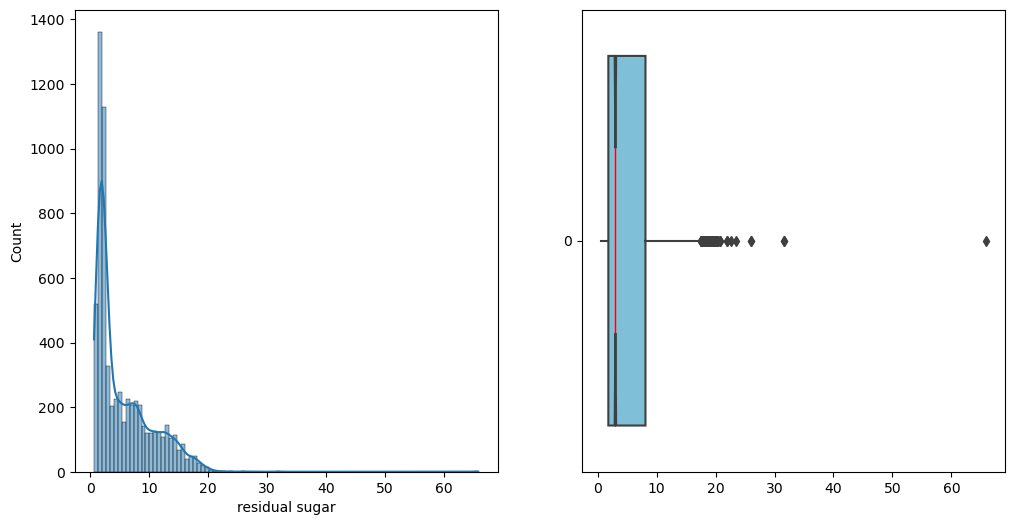

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["residual sugar"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["residual sugar"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Podemos observar que a observação com um valor de açúcar residual de 65 é extremamente atípica em comparação com o restante dos dados. Diante disso, podemos propor a remoção dessa observação para avaliar seu impacto nas estatísticas descritivas. Essa abordagem nos permitirá entender melhor como essa observação influencia as medidas de tendência central e dispersão dos dados, ajudando a garantir uma análise mais precisa e confiável.

In [25]:
# Removendo outlier
loc_out = x[x["residual sugar"] == 65.8]
x_n = x.drop(loc_out.index[0])

In [26]:
x["residual sugar"].describe()

count   6492.0000
mean       5.4403
std        4.7553
min        0.6000
25%        1.8000
50%        3.0000
75%        8.1000
max       65.8000
Name: residual sugar, dtype: float64

In [27]:
x_n["residual sugar"].describe()

count   6491.0000
mean       5.4310
std        4.6963
min        0.6000
25%        1.8000
50%        3.0000
75%        8.1000
max       31.6000
Name: residual sugar, dtype: float64

Após verificar a descrição da variável, constatamos que a remoção do outlier não trouxe uma melhora significativa nos resultados. Portanto, decidimos voltar à modelagem sem a remoção do outlier. Esta decisão é baseada na análise das estatísticas descritivas e nos objetivos específicos do projeto. Continuaremos a modelagem considerando todos os dados disponíveis, mantendo assim a integridade do conjunto de dados original e garantindo uma análise abrangente e robusta.

#### Transformação do quadrado da tangente seguida do log

Para aprimorar a distribuição da variável ‘açúcar residual’, propõe-se uma transformação que combina a tangente do valor com o logaritmo do quadrado. Essa abordagem oferece uma alternativa para normalizar os dados e otimizar sua distribuição.

      
      x['tql_residual_sugar'] = np.log(np.tan((x['residual sugar']))**2)

In [115]:
x['residual sugar trans'] = np.log(np.tan((x['residual sugar']))**2)

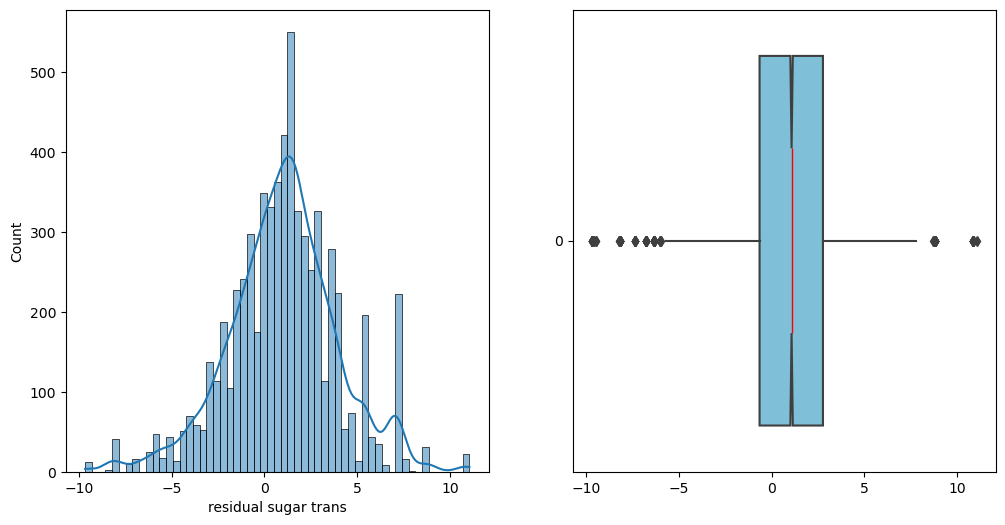

In [116]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x['residual sugar trans'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x['residual sugar trans'], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Como evidenciado pelo histograma e pelo boxplot, a distribuição da nova variável transformada demonstra uma melhoria significativa na simetria, assemelhando-se mais à distribuição normal. Isso facilitará o ajuste do nosso modelo. É importante salientar que os modelos serão ajustados tanto para as variáveis transformadas quanto para as originais. Isso nos permitirá comparar e verificar se há uma melhoria no desempenho dos algoritmos.

### Cloretos

In [31]:
x["chlorides"].describe()

count   6492.0000
mean       0.0560
std        0.0350
min        0.0090
25%        0.0380
50%        0.0470
75%        0.0650
max        0.6110
Name: chlorides, dtype: float64

In [121]:
l = x[x['chlorides'] <=0.065]

In [32]:
x["chlorides"].mode()

0   0.0440
Name: chlorides, dtype: float64

A análise dos níveis de cloretos no vinho revela informações importantes sobre a distribuição da variável. A média de 0.056 indica que, em média, os vinhos possuem essa quantidade de cloretos. O desvio padrão de 0.0350 demonstra a dispersão dos dados em torno da média, com a maioria dos vinhos se concentrando no intervalo entre 0.021 e 0.091.

A análise da mediana (0.0470) e da moda (0.044), ambas abaixo da média, evidencia uma assimetria positiva na distribuição dos dados. Isso significa que a cauda da distribuição se estende mais para valores altos de cloretos do que para valores baixos. A observação de que o segundo quartil está mais próximo do primeiro quartil do que do terceiro quartil corrobora essa conclusão.

Podemos verificar que existe um valor máximo bem distante do terceiro quartil, podendo ser ele o possível causador da assimetria nos dados.

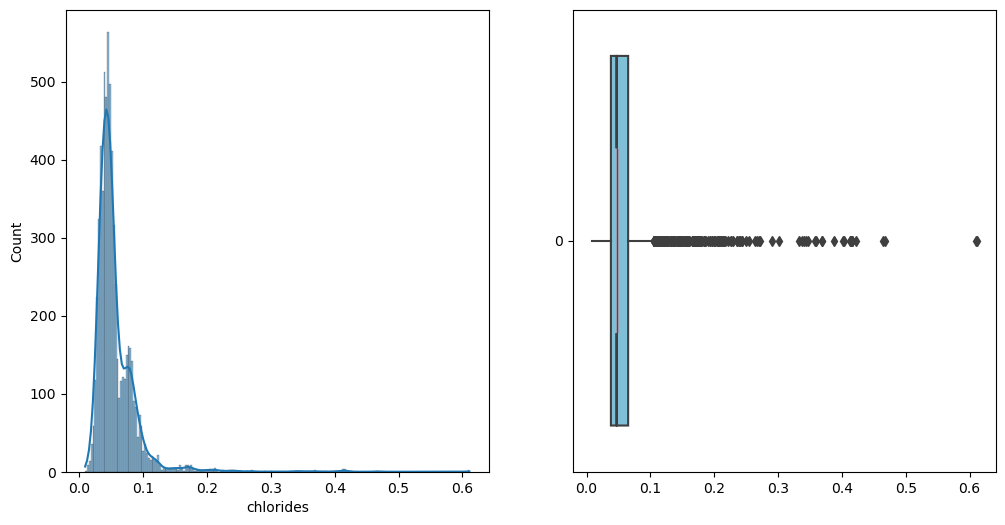

In [125]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["chlorides"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["chlorides"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Ao verificar o histograma e o boxplot, observamos que há muitas observações dispersas após o valor de 0,071 de cloreto, causando uma assimetria positiva. Vamos aplicar algumas transformações para tentar diminuir a dispersão das observações que estão além do 3º quartil.

#### Transformação do modolo do logarítimica

Para diminuir a assimetria positiva da variável de cloreto, vamos aplicar a transformação logarítmica e depois aplicar o modulo nessa variável. Ao aplicar a transformação do modulo logarítmico, esperamos que a distribuição da variável 'chlorides' se torne mais simétrica, reduzindo a dispersão das observações que estão além do 3º quartil.



In [136]:
x["log chlorides"] = (np.log(x["chlorides"]) * -1) 

In [137]:
x["log chlorides"].describe()

count   6492.0000
mean       2.9906
std        0.4313
min        0.4927
25%        2.7334
50%        3.0576
75%        3.2702
max        4.7105
Name: log chlorides, dtype: float64

In [139]:
x["log chlorides"].mode()

0   3.1236
Name: log chlorides, dtype: float64

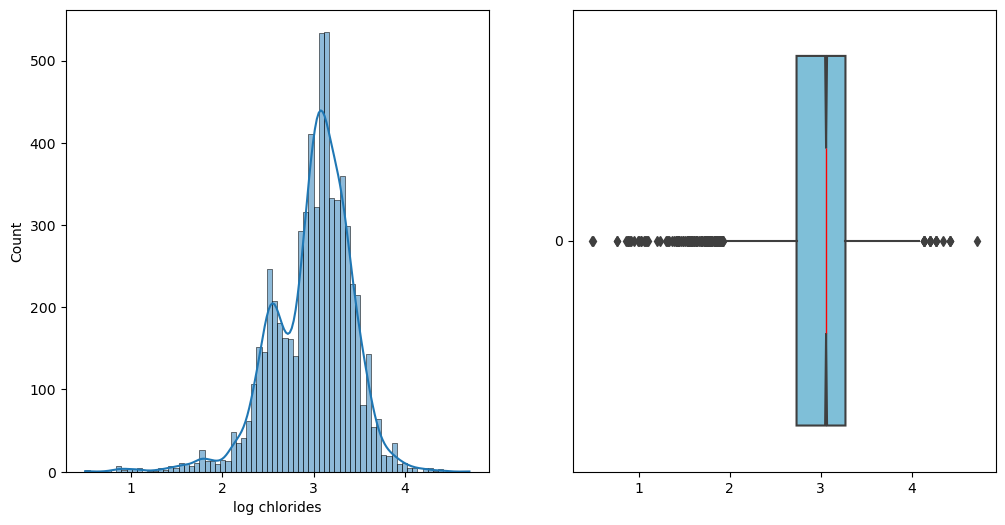

In [138]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["log chlorides"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["log chlorides"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Após verificar os gráficos após a transformação, observamos que a média se aproxima da mediana e da moda. Essa convergência indica uma distribuição mais simétrica, sinalizando um equilíbrio na distribuição dos dados. Além disso, somar e subtrair o desvio padrão da média resulta em valores próximos ao 1º e 3º quartis, respectivamente. Essa relação reforça a observação da simetria, demonstrando que a variabilidade dos dados está distribuída de forma mais uniforme em torno da média.

### Dióxido de Enxofre Livre

In [142]:
x["free sulfur dioxide"].describe()

count   6492.0000
mean      30.5206
std       17.7518
min        1.0000
25%       17.0000
50%       29.0000
75%       41.0000
max      289.0000
Name: free sulfur dioxide, dtype: float64

In [40]:
# Moda da variável "free sulfur dioxide"
x["free sulfur dioxide"].mode()

0   29.0000
Name: free sulfur dioxide, dtype: float64

A média da quantidade de dióxido de enxofre livre é de aproximadamente 30,52, com um desvio padrão de 17,75. Isso indica que a maioria dos valores está no intervalo de aproximadamente 12.77 a 48.27.

Além disso, a mediana e a moda são iguais (29), situando-se um pouco abaixo da média. Entretanto, o segundo quartil está mais próximo do primeiro, e há um valor máximo muito acima do terceiro quartil, indicando a existência de uma distribuição assimetricamente positiva.

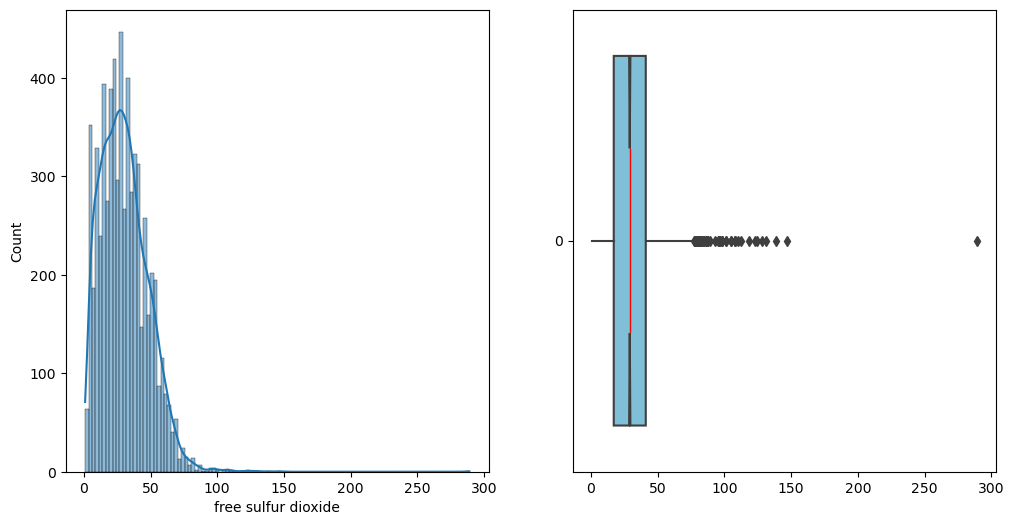

In [143]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["free sulfur dioxide"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["free sulfur dioxide"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Ao verificar o gráfico de histograma e boxplot, podemos ver que a afirma de assimetria possitiva é válida. Portanto, vamos propor alguma transformação para tentar diminuir essa assimetria, afim de melhorar a variabilidade dos dados.

Para melhorar a assimetria dos dados, vamos propor criar uma nova variavel, ela vai indicar a proporção de dióxido livre em relação ao total, mas antes disso vamos fazer uma análise da variavel de dióxido de enxofre total.

### Dióxido de Enxofre Total

In [43]:
x["total sulfur dioxide"].describe()

count   6492.0000
mean     115.7150
std       56.5253
min        6.0000
25%       77.0000
50%      118.0000
75%      156.0000
max      440.0000
Name: total sulfur dioxide, dtype: float64

In [44]:
x["total sulfur dioxide"].mode()

0   111.0000
Name: total sulfur dioxide, dtype: float64

A média de dióxido de enxofre total é de 115.715, com um desvio padrão de aproximadamente 56.53. Isso significa que a maioria dos vinhos possui entre 59.18 e 172.24 de dióxido de enxofre total.

Podemos observar que o máximo de dióxido de enxofre é de 440 é consideravelmente superior ao terceiro quartil (167) sugere a presença de outliers ou valores extremos que podem estar influenciando a distribuição da variável.

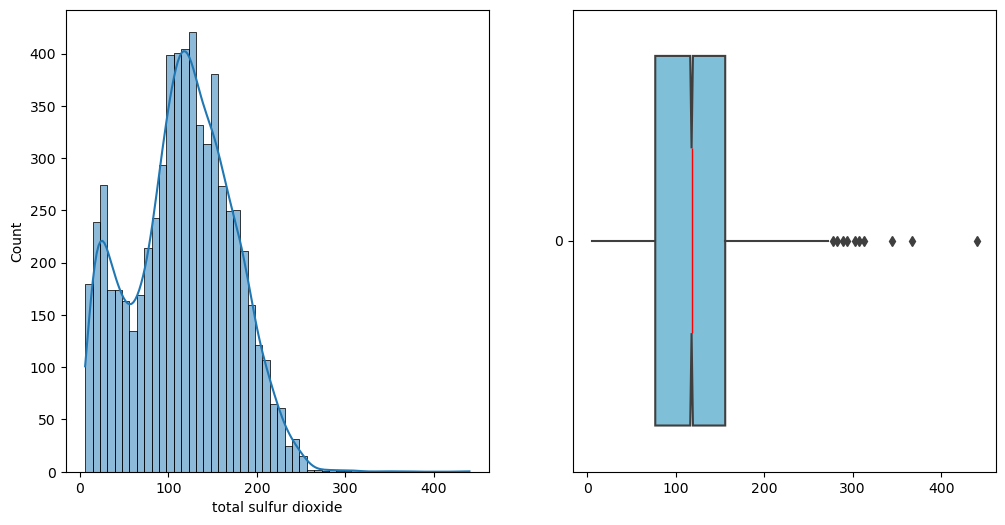

In [150]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["total sulfur dioxide"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["total sulfur dioxide"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Ao plotar o histograma e o boxplot do dióxido total, observamos a presença de outliers para valores grandes, além de uma assimetria positiva. Como mencionado anteriormente, planejamos combinar a variável de dióxido total com a variável de dióxido livre para aprimorar a qualidade da distribuição dos dados de ambas as variáveis

### Combinação Dióxido de Enxofre Livre e Total

Como vimos acima, as variáveis de dióxido possui alguns anomalias nas suas distribuição, contendo outliers que distorcem a sua distribuição. Afim de melhorar isso, foi proposto uma transformação para criar uma nova variável **(proportional free dioxide)**. Essa transformação consiste na seguinte combinação:

    x['proporcional_f_dioxido'] = np.sqrt(x['free sulfur dioxide']/x['total sulfur dioxide'])

In [47]:
x["proporcional_f_dioxido"] = np.sqrt(
    x["free sulfur dioxide"] / x["total sulfur dioxide"]
)

In [48]:
x["proporcional_f_dioxido"].describe()

count   6492.0000
mean       0.5230
std        0.1150
min        0.1508
25%        0.4495
50%        0.5194
75%        0.5907
max        0.9258
Name: proporcional_f_dioxido, dtype: float64

In [49]:
x["proporcional_f_dioxido"].mode()

0   0.5000
Name: proporcional_f_dioxido, dtype: float64

Após a combinação das variáveis, observamos suas novas medidas, com uma nova média de 0.523 e um desvio padrão de 0.115. Isso indica que a maioria dos vinhos tem uma proporção de dióxido livre, após ser submetida à raiz quadrada, entre 0.408 e 0.638.
2.5
Também notamos que o valor mínimo de 0.1508 e o máximo de 0.9258 estão bastante distantes do primeiro quartil (0.4495) e do terceiro quartil (0.5907), respectivamente. Isso sugere que a transformação não foi capaz de lidar completamente com os outliers. No entanto, é importante ressaltar que a média, mediana e moda estão quase exatamente igual a 0.5, indicando um ajuste para uma melhor simetria dos dados.

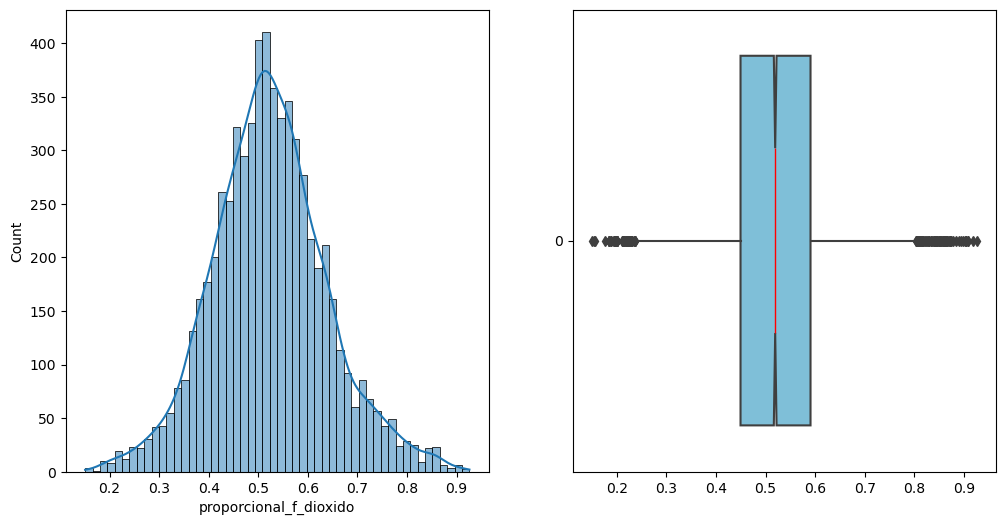

In [153]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x["proporcional_f_dioxido"], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x["proporcional_f_dioxido"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Podemos verificar tanto no boxplot quanto no histograma, que a afirmação dos outliers e simetria nos dados se concretizam.

### Densidade

In [52]:
x["density"].describe()

count   6492.0000
mean       1.7114
std        7.6390
min        0.9871
25%        0.9923
50%        0.9949
75%        0.9970
max      103.8980
Name: density, dtype: float64

In [154]:
x["density"].mode()

0   0.9972
1   0.9976
Name: density, dtype: float64

Primeiramente, podemos notar que existe um ou mais observações com possível erro, dado possui um valor máximo de 103.898, sendo impossível um vinho atingir essa quantidade de densidade. Portanto, vamos verificar a existência de possíveis erros dessa variável.

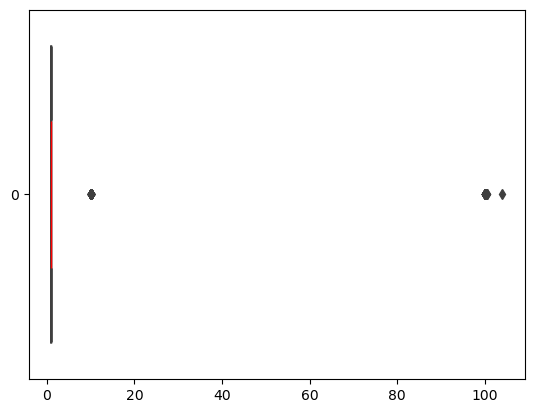

In [170]:
sns.boxplot(x["density"], orient='h',    notch=True, showcaps=False,
    boxprops={"facecolor": (0, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 1})
plt.show()

Analisando o boxplot, podemos ver que existem erros a partir de valores próximos de 10

Ao analisar as medidas da variável densidade, observamos que a média é de 0,994, com um desvio padrão de 0,003. Isso indica que a maioria dos vinhos tem densidade entre 0,991 e 0,997.

Também podemos verificar que o valor máximo é um possível outlier, pois está aproximadamente 14 desvios padrão acima do terceiro quartil. Isso faz com que os gráficos de histograma e boxplot não apresentem uma boa simetria.

Vale ressaltar que a média, mediana e moda ficam bem próximas, sugerindo uma possível simetria nos dados.

In [54]:
# sns.histplot(x["density"] , kde=True)
# plt.show()

In [55]:
# sns.boxplot(x["density"], orient='h',    notch=True, showcaps=False,
#     boxprops={"facecolor": (0, .5, .7, .5)},
#     medianprops={"color": "r", "linewidth": 1})
# plt.show()

Diversas transformações foram avaliadas para reduzir o impacto do outlier com densidade de 1.039, mas nenhuma foi bem-sucedida. No entanto, como desejamos utilizar todos os dados disponíveis, adotaremos duas abordagens:

Incluir essa observação nos dados de treinamento.
Incluir essa observação nos dados de teste.
Em seguida, avaliaremos o impacto dessa observação nos resultados dos modelos.